# Promote Robustness with Noise

Training a neural network with a small dataset can cause the network to memorize all training examples, leading to poor performance on a holdout dataset. Given the patchy or sparse sampling of points in the high-dimensional input space, small datasets may also represent a harder mapping problem for neural networks to learn. One approach to making the input space smoother and easier to learn is to add noise to inputs during training. In this tutorial, you will discover that adding noise to a neural network during training can improve the robustness of the network, resulting in better generalization and faster learning. After reading this tutorial, you will know:

* Small datasets can make learning challenging for neural nets, and the examples can be memorized.
* Adding noise during training can make the training process more robust and reduce generalization error.
* Noise is traditionally added to the inputs but can also be added to weights, gradients, and even activation functions.

## Noise Regularization

In this section, you will discover the brittleness of large network weights and how the addition of statistical noise can provide a regularizing effect, as well as tips to help when adding noise to your neural network models.

### Challenge of Small Training Datasets

Small datasets can introduce problems when training large neural networks. The first problem is that the network may effectively memorize the training dataset. Instead of learning a general mapping from inputs to outputs, the model may learn the specific input examples and their associated outputs. This will result in a model that performs well on the training dataset and poor on new data, such as a holdout dataset. The second problem is that a small dataset provides less opportunity to describe the structure of the input space and its relationship to the output. More training data provides a richer description of the problem from which the model may learn. Fewer data points mean that rather than a smooth input space, the points may represent a jarring and disjointed structure that may result in a difficult, if not unlearnable, the mapping function. It is not always possible to acquire more data. Further, getting a hold of more data may not address these problems.

### Add Random Noise During Training

One approach to improving generalization error and improving the mapping problem's structure is to add random noise.

At first, this sounds like a recipe for making learning more challenging. It is a counter-intuitive suggestion to improving performance because one would expect noise to degrade the model's performance during training.

The addition of noise during the training of a neural network model has a regularization effect and, in turn, improves the robustness of the model. It has been shown to have a similar impact on the loss function as the addition of a penalty term, as in the case of weight regularization
methods.

Each time a training sample is exposed to the model, random noise is added to the input variables making them different every time it is exposed. In this way, adding noise to input samples is a simple form of data augmentation. In effect, adding noise expands the size of the training dataset.

Adding noise means that the network cannot memorize training samples because they are changing all of the time, resulting in smaller network weights and a more robust network with lower generalization error. The noise means that it is as though new samples are being drawn from the domain in the vicinity of known samples, smoothing the structure of the input space. This smoothing may mean that the mapping function is easier for the network to learn, resulting in better and faster learning.

### How and Where to Add noise

The most common type of noise used during training is the addition of Gaussian noise to input variables. Gaussian noise, or white noise, has a mean of zero and a standard deviation of one and can be generated as needed using a pseudorandom number generator. The addition of Gaussian noise to the inputs to a neural network was traditionally referred to as jitter or random jitter after using the term in signal processing to refer to the uncorrelated random noise in electrical circuits. The amount of noise added (e.g., the spread or standard deviation) is a configurable hyperparameter. Too little noise has no effect, whereas too much noise makes the mapping function challenging to learn.

The standard deviation of the random noise controls the amount of spread and can be adjusted based on the scale of each input variable. It can be easier to configure if the scale of the input variables has first been normalized. Noise is only added during training. No noise is added during the evaluation of the model or when the model is used to make predictions on new data. The addition of noise is also an important part of automatic feature learning, such as in autoencoders, so-called denoising autoencoders that explicitly require models to learn robust features in the presence of noise added to inputs.

Although additional noise to the inputs is the most common and widely studied approach, random noise can be added to other network parts during training. Some examples include:

* Add noise to activations, i.e., the outputs of each layer.
* Add noise to weights, i.e., an alternative to the inputs.
* Add noise to the gradients, i.e., the direction to update weights.
* Add noise to the outputs, i.e., the labels or target variables.

The addition of noise to the layer activations allows noise to be used at any point in the network. This can be beneficial for very deep networks. Noise can be added to the layer outputs themselves, but this is more likely achieved via a noisy activation function. The addition of noise to weights allows the approach to be used throughout the network in a consistent way instead of adding noise to inputs and layer activations. This is particularly useful in recurrent neural networks.

The addition of noise to gradients focuses more on improving the robustness of the optimization process itself rather than the structure of the input domain. The noise can start high at the beginning of training and decrease over time, much like a decaying learning rate.
This approach has proven to be an effective method for very deep networks and various network types.

Adding noise to the activations, weights, or gradients provides a more generic approach to adding noise that is invariant to the input variables provided to the model. If the problem domain is believed or expected to have mislabeled examples, then adding noise to the class label can improve the model's robustness to this type of error. Although, it can be easy to derail the learning process. Adding noise to a continuous target variable in the case of regression or time series forecasting is much like the addition of noise to the input variables and
maybe a better use case.

### Tips for Adding Noise During Training

This section provides some tips for adding noise during training with your neural network.

**Problem Types for Adding Noise**

Noise can be added to training regardless of the type of problem that is being addressed. It is appropriate to try adding noise to both classification and regression type problems. The type of noise can be specialized to the types of data used as input to the model, for example, two-dimensional noise in images and signal noise in audio data.

**Add Noise to Different Network Types**

Adding noise during training is a generic method that can be used regardless of the neural network used. It was a method used primarily with Multilayer Perceptrons given their prior dominance, but it can be used with Convolutional and Recurrent Neural Networks.

**Rescale Data First**

It is important that the addition of noise has a consistent effect on the model. This requires that the input data is rescaled so that all variables have the same scale so that when noise is added to the inputs with a fixed variance, it has the same effect. It also applies to adding noise to weights and gradients as they are affected by the scale of the inputs. This can be achieved via standardization or normalization of input variables. If random noise is added after data scaling, the variables may need to be rescaled, perhaps per minibatch.

**Test the Amount of Noise**
You cannot know how much noise will benefit your specific model on your training dataset. Experiment with different amounts, and even different types of noise, to discover what works best. Be systematic and use controlled experiments, perhaps on smaller datasets across a range of values.

**Noisy Training Only**

Noise is only added during the training of your model. Be sure that any source of noise is not added during the evaluation of your model or when your model is used to make predictions on new data.

## Noise Regularization Case Study

In this section, we will demonstrate how to use noise regularization to reduce the overfitting of an MLP on a simple binary classification problem. This example provides a template for applying noise regularization to your neural network for classification and regression problems.

### Binary Classification Problem

We will use a standard binary classification problem that defines two two-dimensional concentric circles of observations: one circle for each class. Each observation has two input variables with the same scale and a class output value of 0 or 1. This dataset is called the `circles` dataset because of the shape of the observations in each class when plotted. We can use the `make_circles()` function to generate observations from this problem. We will add noise to the data and seed the random number generator to generate the same samples each time the code is run.

```
# generate 2d classification dataset
X, y = make_circles(n_samples=100, noise=0.1, random_state=1)
```

We can plot the dataset where the two variables are taken as `x` and `y` coordinates on a graph, and the class value is taken as the color of the observation. The complete example of generating the dataset and plotting it is listed below.

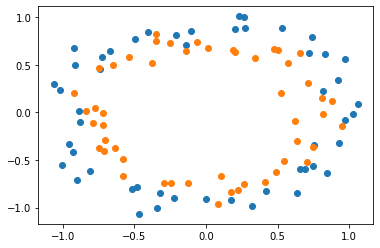

In [1]:
# scatter plot of moons dataset
from sklearn.datasets import make_circles
from matplotlib import pyplot
from numpy import where

# generate 2d classification dataset
X, y = make_circles(n_samples=100, noise=0.1, random_state=1)

# scatter plot for each class value
for class_value in range(2):
    # select indices of points with the class label
    row_ix = where(y == class_value)
    
    # scatter plot for points with a different color
    pyplot.scatter(X[row_ix, 0], X[row_ix, 1])

# show plot
pyplot.show()

Running the example creates a scatter plot showing the concentric circles shape of the observations in each class. We can see the noise in the dispersal of the points, making the circles less obvious.

This is a good test problem because a line cannot separate the classes, e.g., are not linearly separable, requiring a nonlinear method such as a neural network to address. We have only generated 100 samples, which is small for a neural network, providing the opportunity to overfit the training dataset and have a higher error on the test dataset: a good case for using regularization. Further, the samples have noise, allowing the model to learn aspects of the samples that do not generalize.

### Overfit Multilayer Perceptron Model

We can develop an MLP model to address this binary classification problem. The model will have one hidden layer with more nodes that may be required to solve this problem, providing an opportunity to overfit. We will also train the model for longer than is required to ensure the model overfits. Before we define the model, we will split the dataset into train and test sets, using 30 examples to train the model and 70 to evaluate the fit model's performance.

In [2]:
# overfit mlp for the moons dataset
from sklearn.datasets import make_circles
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from matplotlib import pyplot

# generate 2d classification dataset
X, y = make_circles(n_samples=100, noise=0.1, random_state=1)

# split into train and test
n_train = 30
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]

Next, we can define the model. The model uses 500 nodes in the hidden layer and the rectified linear activation function. A sigmoid activation function is used in the output layer to predict class values of 0 or 1. The model is optimized using the binary cross-entropy loss function, suitable for binary classification problems and the efficient Adam version of gradient descent.

In [3]:
# define model
model = Sequential()
model.add(Dense(500, input_dim=2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

The defined model is then fit on the training data for 4,000 epochs and the default batch size of 32. We will use the test set as the validation dataset to get an idea of the model performance on a holdout dataset during training.

In [4]:
# fit model
history = model.fit(trainX, trainy, epochs=4000, validation_data=(testX, testy), verbose=1)

Epoch 1/4000
1/1 [==============================] - 1s 849ms/step - loss: 0.6943 - accuracy: 0.5333 - val_loss: 0.6961 - val_accuracy: 0.4429
Epoch 2/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.6911 - accuracy: 0.6667 - val_loss: 0.6978 - val_accuracy: 0.4571
Epoch 3/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.6880 - accuracy: 0.6000 - val_loss: 0.6996 - val_accuracy: 0.4571
Epoch 4/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.6850 - accuracy: 0.6000 - val_loss: 0.7014 - val_accuracy: 0.4429
Epoch 5/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.6823 - accuracy: 0.6000 - val_loss: 0.7034 - val_accuracy: 0.4429
Epoch 6/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.6796 - accuracy: 0.6000 - val_loss: 0.7054 - val_accuracy: 0.4286
Epoch 7/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.6771 - accuracy: 0.6000 - val_loss: 0.7074 - val_accuracy: 0.4286
Epoch 8/4000

Epoch 59/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.6064 - accuracy: 0.6667 - val_loss: 0.7646 - val_accuracy: 0.4571
Epoch 60/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.6053 - accuracy: 0.6667 - val_loss: 0.7648 - val_accuracy: 0.4571
Epoch 61/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.6042 - accuracy: 0.6667 - val_loss: 0.7650 - val_accuracy: 0.4571
Epoch 62/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.6031 - accuracy: 0.6667 - val_loss: 0.7652 - val_accuracy: 0.4571
Epoch 63/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.6021 - accuracy: 0.6667 - val_loss: 0.7654 - val_accuracy: 0.4571
Epoch 64/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.6010 - accuracy: 0.6667 - val_loss: 0.7655 - val_accuracy: 0.4571
Epoch 65/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.5999 - accuracy: 0.6667 - val_loss: 0.7657 - val_accuracy: 0.4571
Epoch 

1/1 [==============================] - 0s 22ms/step - loss: 0.5448 - accuracy: 0.7333 - val_loss: 0.7539 - val_accuracy: 0.4857
Epoch 117/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.5437 - accuracy: 0.7333 - val_loss: 0.7532 - val_accuracy: 0.4857
Epoch 118/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.5425 - accuracy: 0.7333 - val_loss: 0.7525 - val_accuracy: 0.4857
Epoch 119/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.5414 - accuracy: 0.7333 - val_loss: 0.7519 - val_accuracy: 0.4857
Epoch 120/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.5402 - accuracy: 0.7333 - val_loss: 0.7512 - val_accuracy: 0.4857
Epoch 121/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.5391 - accuracy: 0.7333 - val_loss: 0.7505 - val_accuracy: 0.4857
Epoch 122/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.5380 - accuracy: 0.7333 - val_loss: 0.7498 - val_accuracy: 0.4857
Epoch 123/4000

1/1 [==============================] - 0s 22ms/step - loss: 0.4703 - accuracy: 0.8333 - val_loss: 0.6872 - val_accuracy: 0.5857
Epoch 174/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.4689 - accuracy: 0.8333 - val_loss: 0.6858 - val_accuracy: 0.5857
Epoch 175/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.4675 - accuracy: 0.8333 - val_loss: 0.6845 - val_accuracy: 0.5857
Epoch 176/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.4662 - accuracy: 0.8333 - val_loss: 0.6831 - val_accuracy: 0.5857
Epoch 177/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.4648 - accuracy: 0.8333 - val_loss: 0.6817 - val_accuracy: 0.5857
Epoch 178/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.4634 - accuracy: 0.8333 - val_loss: 0.6803 - val_accuracy: 0.5857
Epoch 179/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.4620 - accuracy: 0.8333 - val_loss: 0.6789 - val_accuracy: 0.5857
Epoch 180/4000

1/1 [==============================] - 0s 22ms/step - loss: 0.3958 - accuracy: 0.8333 - val_loss: 0.6053 - val_accuracy: 0.6714
Epoch 231/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.3946 - accuracy: 0.8333 - val_loss: 0.6038 - val_accuracy: 0.6714
Epoch 232/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.3933 - accuracy: 0.8333 - val_loss: 0.6023 - val_accuracy: 0.6714
Epoch 233/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.3921 - accuracy: 0.8333 - val_loss: 0.6007 - val_accuracy: 0.6714
Epoch 234/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.3908 - accuracy: 0.8333 - val_loss: 0.5993 - val_accuracy: 0.6714
Epoch 235/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.3896 - accuracy: 0.8333 - val_loss: 0.5978 - val_accuracy: 0.6714
Epoch 236/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.3883 - accuracy: 0.8333 - val_loss: 0.5964 - val_accuracy: 0.6714
Epoch 237/4000

1/1 [==============================] - 0s 22ms/step - loss: 0.3281 - accuracy: 0.8667 - val_loss: 0.5314 - val_accuracy: 0.7143
Epoch 288/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.3271 - accuracy: 0.8667 - val_loss: 0.5303 - val_accuracy: 0.7143
Epoch 289/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.3260 - accuracy: 0.8667 - val_loss: 0.5293 - val_accuracy: 0.7286
Epoch 290/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.3249 - accuracy: 0.8667 - val_loss: 0.5284 - val_accuracy: 0.7286
Epoch 291/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.3239 - accuracy: 0.8667 - val_loss: 0.5274 - val_accuracy: 0.7286
Epoch 292/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.3228 - accuracy: 0.8667 - val_loss: 0.5263 - val_accuracy: 0.7286
Epoch 293/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.3217 - accuracy: 0.8667 - val_loss: 0.5251 - val_accuracy: 0.7286
Epoch 294/4000

1/1 [==============================] - 0s 22ms/step - loss: 0.2726 - accuracy: 0.9667 - val_loss: 0.4810 - val_accuracy: 0.7571
Epoch 345/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.2718 - accuracy: 0.9667 - val_loss: 0.4803 - val_accuracy: 0.7571
Epoch 346/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.2709 - accuracy: 0.9667 - val_loss: 0.4796 - val_accuracy: 0.7571
Epoch 347/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.2701 - accuracy: 0.9667 - val_loss: 0.4789 - val_accuracy: 0.7571
Epoch 348/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.2692 - accuracy: 0.9667 - val_loss: 0.4782 - val_accuracy: 0.7571
Epoch 349/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.2683 - accuracy: 0.9667 - val_loss: 0.4776 - val_accuracy: 0.7571
Epoch 350/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.2675 - accuracy: 0.9667 - val_loss: 0.4770 - val_accuracy: 0.7571
Epoch 351/4000

1/1 [==============================] - 0s 22ms/step - loss: 0.2286 - accuracy: 0.9667 - val_loss: 0.4511 - val_accuracy: 0.8000
Epoch 402/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.2279 - accuracy: 0.9667 - val_loss: 0.4510 - val_accuracy: 0.8000
Epoch 403/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.2272 - accuracy: 0.9667 - val_loss: 0.4507 - val_accuracy: 0.8000
Epoch 404/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.2266 - accuracy: 0.9667 - val_loss: 0.4504 - val_accuracy: 0.8000
Epoch 405/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.2259 - accuracy: 0.9667 - val_loss: 0.4501 - val_accuracy: 0.8000
Epoch 406/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.2253 - accuracy: 0.9667 - val_loss: 0.4498 - val_accuracy: 0.8000
Epoch 407/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.2246 - accuracy: 0.9667 - val_loss: 0.4495 - val_accuracy: 0.8000
Epoch 408/4000

1/1 [==============================] - 0s 22ms/step - loss: 0.1952 - accuracy: 0.9667 - val_loss: 0.4452 - val_accuracy: 0.7857
Epoch 459/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.1947 - accuracy: 0.9667 - val_loss: 0.4452 - val_accuracy: 0.7857
Epoch 460/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.1942 - accuracy: 0.9667 - val_loss: 0.4452 - val_accuracy: 0.7857
Epoch 461/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.1937 - accuracy: 0.9667 - val_loss: 0.4450 - val_accuracy: 0.7857
Epoch 462/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.1932 - accuracy: 0.9667 - val_loss: 0.4450 - val_accuracy: 0.7857
Epoch 463/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.1927 - accuracy: 0.9667 - val_loss: 0.4450 - val_accuracy: 0.7857
Epoch 464/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.1922 - accuracy: 0.9667 - val_loss: 0.4451 - val_accuracy: 0.7857
Epoch 465/4000

1/1 [==============================] - 0s 22ms/step - loss: 0.1700 - accuracy: 0.9667 - val_loss: 0.4491 - val_accuracy: 0.8000
Epoch 516/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.1696 - accuracy: 0.9667 - val_loss: 0.4492 - val_accuracy: 0.8000
Epoch 517/4000
1/1 [==============================] - 0s 26ms/step - loss: 0.1693 - accuracy: 0.9667 - val_loss: 0.4493 - val_accuracy: 0.8000
Epoch 518/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.1689 - accuracy: 0.9667 - val_loss: 0.4494 - val_accuracy: 0.8000
Epoch 519/4000
1/1 [==============================] - 0s 25ms/step - loss: 0.1685 - accuracy: 0.9667 - val_loss: 0.4495 - val_accuracy: 0.8000
Epoch 520/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.1681 - accuracy: 0.9667 - val_loss: 0.4496 - val_accuracy: 0.8000
Epoch 521/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.1677 - accuracy: 0.9667 - val_loss: 0.4497 - val_accuracy: 0.8000
Epoch 522/4000

1/1 [==============================] - 0s 23ms/step - loss: 0.1506 - accuracy: 0.9667 - val_loss: 0.4573 - val_accuracy: 0.8000
Epoch 573/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.1503 - accuracy: 0.9667 - val_loss: 0.4575 - val_accuracy: 0.8000
Epoch 574/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.1500 - accuracy: 0.9667 - val_loss: 0.4578 - val_accuracy: 0.8000
Epoch 575/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.1497 - accuracy: 0.9667 - val_loss: 0.4580 - val_accuracy: 0.8000
Epoch 576/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.1494 - accuracy: 0.9667 - val_loss: 0.4582 - val_accuracy: 0.8000
Epoch 577/4000
1/1 [==============================] - 0s 24ms/step - loss: 0.1491 - accuracy: 0.9667 - val_loss: 0.4585 - val_accuracy: 0.8143
Epoch 578/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.1488 - accuracy: 0.9667 - val_loss: 0.4587 - val_accuracy: 0.8143
Epoch 579/4000

1/1 [==============================] - 0s 22ms/step - loss: 0.1353 - accuracy: 0.9667 - val_loss: 0.4670 - val_accuracy: 0.8143
Epoch 630/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.1351 - accuracy: 0.9667 - val_loss: 0.4673 - val_accuracy: 0.8143
Epoch 631/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.1348 - accuracy: 0.9667 - val_loss: 0.4675 - val_accuracy: 0.8286
Epoch 632/4000
1/1 [==============================] - 0s 24ms/step - loss: 0.1346 - accuracy: 0.9667 - val_loss: 0.4678 - val_accuracy: 0.8286
Epoch 633/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.1343 - accuracy: 0.9667 - val_loss: 0.4680 - val_accuracy: 0.8286
Epoch 634/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.1341 - accuracy: 0.9667 - val_loss: 0.4682 - val_accuracy: 0.8286
Epoch 635/4000
1/1 [==============================] - 0s 24ms/step - loss: 0.1339 - accuracy: 0.9667 - val_loss: 0.4683 - val_accuracy: 0.8286
Epoch 636/4000

1/1 [==============================] - 0s 22ms/step - loss: 0.1229 - accuracy: 0.9667 - val_loss: 0.4746 - val_accuracy: 0.8143
Epoch 687/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.1227 - accuracy: 0.9667 - val_loss: 0.4748 - val_accuracy: 0.8143
Epoch 688/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.1225 - accuracy: 0.9667 - val_loss: 0.4751 - val_accuracy: 0.8143
Epoch 689/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.1223 - accuracy: 0.9667 - val_loss: 0.4753 - val_accuracy: 0.8143
Epoch 690/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.1221 - accuracy: 0.9667 - val_loss: 0.4755 - val_accuracy: 0.8143
Epoch 691/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.1219 - accuracy: 0.9667 - val_loss: 0.4756 - val_accuracy: 0.8143
Epoch 692/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.1217 - accuracy: 0.9667 - val_loss: 0.4757 - val_accuracy: 0.8143
Epoch 693/4000

1/1 [==============================] - 0s 22ms/step - loss: 0.1127 - accuracy: 0.9667 - val_loss: 0.4857 - val_accuracy: 0.8143
Epoch 744/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.1125 - accuracy: 0.9667 - val_loss: 0.4859 - val_accuracy: 0.8143
Epoch 745/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.1124 - accuracy: 0.9667 - val_loss: 0.4861 - val_accuracy: 0.8143
Epoch 746/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.1122 - accuracy: 0.9667 - val_loss: 0.4863 - val_accuracy: 0.8143
Epoch 747/4000
1/1 [==============================] - 0s 27ms/step - loss: 0.1121 - accuracy: 0.9667 - val_loss: 0.4866 - val_accuracy: 0.8143
Epoch 748/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.1119 - accuracy: 0.9667 - val_loss: 0.4869 - val_accuracy: 0.8143
Epoch 749/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.1117 - accuracy: 0.9667 - val_loss: 0.4873 - val_accuracy: 0.8143
Epoch 750/4000

1/1 [==============================] - 0s 22ms/step - loss: 0.1042 - accuracy: 0.9667 - val_loss: 0.5021 - val_accuracy: 0.8286
Epoch 801/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.1041 - accuracy: 0.9667 - val_loss: 0.5024 - val_accuracy: 0.8286
Epoch 802/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.1039 - accuracy: 0.9667 - val_loss: 0.5027 - val_accuracy: 0.8286
Epoch 803/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.1038 - accuracy: 0.9667 - val_loss: 0.5031 - val_accuracy: 0.8286
Epoch 804/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.1036 - accuracy: 0.9667 - val_loss: 0.5036 - val_accuracy: 0.8286
Epoch 805/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.1035 - accuracy: 0.9667 - val_loss: 0.5041 - val_accuracy: 0.8286
Epoch 806/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.1034 - accuracy: 0.9667 - val_loss: 0.5045 - val_accuracy: 0.8286
Epoch 807/4000

1/1 [==============================] - 0s 23ms/step - loss: 0.0968 - accuracy: 0.9667 - val_loss: 0.5214 - val_accuracy: 0.8286
Epoch 858/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0967 - accuracy: 0.9667 - val_loss: 0.5218 - val_accuracy: 0.8286
Epoch 859/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0965 - accuracy: 0.9667 - val_loss: 0.5221 - val_accuracy: 0.8286
Epoch 860/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0964 - accuracy: 0.9667 - val_loss: 0.5223 - val_accuracy: 0.8286
Epoch 861/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0963 - accuracy: 0.9667 - val_loss: 0.5225 - val_accuracy: 0.8286
Epoch 862/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0962 - accuracy: 0.9667 - val_loss: 0.5228 - val_accuracy: 0.8286
Epoch 863/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0961 - accuracy: 0.9667 - val_loss: 0.5231 - val_accuracy: 0.8286
Epoch 864/4000

1/1 [==============================] - 0s 22ms/step - loss: 0.0902 - accuracy: 0.9667 - val_loss: 0.5403 - val_accuracy: 0.8286
Epoch 915/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0901 - accuracy: 0.9667 - val_loss: 0.5405 - val_accuracy: 0.8286
Epoch 916/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0899 - accuracy: 0.9667 - val_loss: 0.5407 - val_accuracy: 0.8286
Epoch 917/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0898 - accuracy: 0.9667 - val_loss: 0.5409 - val_accuracy: 0.8286
Epoch 918/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0897 - accuracy: 0.9667 - val_loss: 0.5412 - val_accuracy: 0.8286
Epoch 919/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0896 - accuracy: 0.9667 - val_loss: 0.5416 - val_accuracy: 0.8286
Epoch 920/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0895 - accuracy: 0.9667 - val_loss: 0.5419 - val_accuracy: 0.8286
Epoch 921/4000

1/1 [==============================] - 0s 22ms/step - loss: 0.0841 - accuracy: 0.9667 - val_loss: 0.5588 - val_accuracy: 0.8143
Epoch 972/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0840 - accuracy: 0.9667 - val_loss: 0.5590 - val_accuracy: 0.8143
Epoch 973/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0839 - accuracy: 0.9667 - val_loss: 0.5591 - val_accuracy: 0.8143
Epoch 974/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0837 - accuracy: 0.9667 - val_loss: 0.5594 - val_accuracy: 0.8143
Epoch 975/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0837 - accuracy: 0.9667 - val_loss: 0.5597 - val_accuracy: 0.8143
Epoch 976/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0835 - accuracy: 0.9667 - val_loss: 0.5601 - val_accuracy: 0.8143
Epoch 977/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0834 - accuracy: 0.9667 - val_loss: 0.5606 - val_accuracy: 0.8143
Epoch 978/4000

1/1 [==============================] - 0s 22ms/step - loss: 0.0778 - accuracy: 1.0000 - val_loss: 0.5791 - val_accuracy: 0.8143
Epoch 1029/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0777 - accuracy: 1.0000 - val_loss: 0.5795 - val_accuracy: 0.8143
Epoch 1030/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0776 - accuracy: 1.0000 - val_loss: 0.5799 - val_accuracy: 0.8143
Epoch 1031/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0775 - accuracy: 1.0000 - val_loss: 0.5803 - val_accuracy: 0.8143
Epoch 1032/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0773 - accuracy: 1.0000 - val_loss: 0.5805 - val_accuracy: 0.8143
Epoch 1033/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0772 - accuracy: 1.0000 - val_loss: 0.5808 - val_accuracy: 0.8143
Epoch 1034/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0771 - accuracy: 1.0000 - val_loss: 0.5811 - val_accuracy: 0.8143
Epoch 10

1/1 [==============================] - 0s 22ms/step - loss: 0.0713 - accuracy: 1.0000 - val_loss: 0.6081 - val_accuracy: 0.8143
Epoch 1086/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0712 - accuracy: 1.0000 - val_loss: 0.6087 - val_accuracy: 0.8143
Epoch 1087/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0711 - accuracy: 1.0000 - val_loss: 0.6094 - val_accuracy: 0.8143
Epoch 1088/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0710 - accuracy: 1.0000 - val_loss: 0.6102 - val_accuracy: 0.8143
Epoch 1089/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0709 - accuracy: 1.0000 - val_loss: 0.6109 - val_accuracy: 0.8143
Epoch 1090/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0708 - accuracy: 1.0000 - val_loss: 0.6115 - val_accuracy: 0.8143
Epoch 1091/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0707 - accuracy: 1.0000 - val_loss: 0.6121 - val_accuracy: 0.8143
Epoch 10

1/1 [==============================] - 0s 23ms/step - loss: 0.0656 - accuracy: 1.0000 - val_loss: 0.6441 - val_accuracy: 0.8000
Epoch 1143/4000
1/1 [==============================] - 0s 24ms/step - loss: 0.0655 - accuracy: 1.0000 - val_loss: 0.6447 - val_accuracy: 0.8000
Epoch 1144/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0654 - accuracy: 1.0000 - val_loss: 0.6453 - val_accuracy: 0.8000
Epoch 1145/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0653 - accuracy: 1.0000 - val_loss: 0.6460 - val_accuracy: 0.8000
Epoch 1146/4000
1/1 [==============================] - 0s 25ms/step - loss: 0.0652 - accuracy: 1.0000 - val_loss: 0.6468 - val_accuracy: 0.8000
Epoch 1147/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0651 - accuracy: 1.0000 - val_loss: 0.6476 - val_accuracy: 0.8000
Epoch 1148/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0650 - accuracy: 1.0000 - val_loss: 0.6483 - val_accuracy: 0.8000
Epoch 11

1/1 [==============================] - 0s 23ms/step - loss: 0.0600 - accuracy: 1.0000 - val_loss: 0.6830 - val_accuracy: 0.8000
Epoch 1200/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0599 - accuracy: 1.0000 - val_loss: 0.6835 - val_accuracy: 0.8000
Epoch 1201/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0598 - accuracy: 1.0000 - val_loss: 0.6841 - val_accuracy: 0.8000
Epoch 1202/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0597 - accuracy: 1.0000 - val_loss: 0.6848 - val_accuracy: 0.8000
Epoch 1203/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0596 - accuracy: 1.0000 - val_loss: 0.6855 - val_accuracy: 0.8000
Epoch 1204/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0595 - accuracy: 1.0000 - val_loss: 0.6862 - val_accuracy: 0.8000
Epoch 1205/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0595 - accuracy: 1.0000 - val_loss: 0.6868 - val_accuracy: 0.8000
Epoch 12

1/1 [==============================] - 0s 22ms/step - loss: 0.0547 - accuracy: 1.0000 - val_loss: 0.7248 - val_accuracy: 0.7857
Epoch 1257/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0546 - accuracy: 1.0000 - val_loss: 0.7255 - val_accuracy: 0.7857
Epoch 1258/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0546 - accuracy: 1.0000 - val_loss: 0.7262 - val_accuracy: 0.7857
Epoch 1259/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0545 - accuracy: 1.0000 - val_loss: 0.7270 - val_accuracy: 0.7857
Epoch 1260/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0544 - accuracy: 1.0000 - val_loss: 0.7278 - val_accuracy: 0.7857
Epoch 1261/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0543 - accuracy: 1.0000 - val_loss: 0.7285 - val_accuracy: 0.7857
Epoch 1262/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0542 - accuracy: 1.0000 - val_loss: 0.7292 - val_accuracy: 0.7857
Epoch 12

1/1 [==============================] - 0s 23ms/step - loss: 0.0499 - accuracy: 1.0000 - val_loss: 0.7690 - val_accuracy: 0.7857
Epoch 1314/4000
1/1 [==============================] - 0s 25ms/step - loss: 0.0499 - accuracy: 1.0000 - val_loss: 0.7697 - val_accuracy: 0.7857
Epoch 1315/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0498 - accuracy: 1.0000 - val_loss: 0.7704 - val_accuracy: 0.7857
Epoch 1316/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0497 - accuracy: 1.0000 - val_loss: 0.7713 - val_accuracy: 0.7857
Epoch 1317/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0496 - accuracy: 1.0000 - val_loss: 0.7721 - val_accuracy: 0.7857
Epoch 1318/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0495 - accuracy: 1.0000 - val_loss: 0.7729 - val_accuracy: 0.7857
Epoch 1319/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0494 - accuracy: 1.0000 - val_loss: 0.7738 - val_accuracy: 0.7857
Epoch 13

1/1 [==============================] - 0s 23ms/step - loss: 0.0455 - accuracy: 1.0000 - val_loss: 0.8132 - val_accuracy: 0.7857
Epoch 1371/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0455 - accuracy: 1.0000 - val_loss: 0.8139 - val_accuracy: 0.7857
Epoch 1372/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0454 - accuracy: 1.0000 - val_loss: 0.8147 - val_accuracy: 0.7857
Epoch 1373/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0453 - accuracy: 1.0000 - val_loss: 0.8155 - val_accuracy: 0.7857
Epoch 1374/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0453 - accuracy: 1.0000 - val_loss: 0.8162 - val_accuracy: 0.7857
Epoch 1375/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0452 - accuracy: 1.0000 - val_loss: 0.8169 - val_accuracy: 0.7857
Epoch 1376/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0451 - accuracy: 1.0000 - val_loss: 0.8177 - val_accuracy: 0.7857
Epoch 13

1/1 [==============================] - 0s 22ms/step - loss: 0.0415 - accuracy: 1.0000 - val_loss: 0.8562 - val_accuracy: 0.7857
Epoch 1428/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0415 - accuracy: 1.0000 - val_loss: 0.8569 - val_accuracy: 0.7857
Epoch 1429/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0414 - accuracy: 1.0000 - val_loss: 0.8577 - val_accuracy: 0.7857
Epoch 1430/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0414 - accuracy: 1.0000 - val_loss: 0.8585 - val_accuracy: 0.7857
Epoch 1431/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0413 - accuracy: 1.0000 - val_loss: 0.8593 - val_accuracy: 0.7857
Epoch 1432/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0412 - accuracy: 1.0000 - val_loss: 0.8600 - val_accuracy: 0.7857
Epoch 1433/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0411 - accuracy: 1.0000 - val_loss: 0.8609 - val_accuracy: 0.7857
Epoch 14

1/1 [==============================] - 0s 24ms/step - loss: 0.0378 - accuracy: 1.0000 - val_loss: 0.8985 - val_accuracy: 0.7857
Epoch 1485/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0378 - accuracy: 1.0000 - val_loss: 0.8993 - val_accuracy: 0.7857
Epoch 1486/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0377 - accuracy: 1.0000 - val_loss: 0.9000 - val_accuracy: 0.7857
Epoch 1487/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0377 - accuracy: 1.0000 - val_loss: 0.9007 - val_accuracy: 0.7857
Epoch 1488/4000
1/1 [==============================] - 0s 25ms/step - loss: 0.0376 - accuracy: 1.0000 - val_loss: 0.9016 - val_accuracy: 0.7857
Epoch 1489/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0375 - accuracy: 1.0000 - val_loss: 0.9024 - val_accuracy: 0.7857
Epoch 1490/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0375 - accuracy: 1.0000 - val_loss: 0.9032 - val_accuracy: 0.7857
Epoch 14

1/1 [==============================] - 0s 24ms/step - loss: 0.0345 - accuracy: 1.0000 - val_loss: 0.9413 - val_accuracy: 0.7857
Epoch 1542/4000
1/1 [==============================] - 0s 24ms/step - loss: 0.0344 - accuracy: 1.0000 - val_loss: 0.9419 - val_accuracy: 0.7857
Epoch 1543/4000
1/1 [==============================] - 0s 24ms/step - loss: 0.0344 - accuracy: 1.0000 - val_loss: 0.9426 - val_accuracy: 0.7857
Epoch 1544/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0343 - accuracy: 1.0000 - val_loss: 0.9434 - val_accuracy: 0.7857
Epoch 1545/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0343 - accuracy: 1.0000 - val_loss: 0.9443 - val_accuracy: 0.7857
Epoch 1546/4000
1/1 [==============================] - 0s 25ms/step - loss: 0.0342 - accuracy: 1.0000 - val_loss: 0.9451 - val_accuracy: 0.7857
Epoch 1547/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0342 - accuracy: 1.0000 - val_loss: 0.9458 - val_accuracy: 0.7857
Epoch 15

1/1 [==============================] - 0s 22ms/step - loss: 0.0315 - accuracy: 1.0000 - val_loss: 0.9826 - val_accuracy: 0.7857
Epoch 1599/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0314 - accuracy: 1.0000 - val_loss: 0.9833 - val_accuracy: 0.7857
Epoch 1600/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0314 - accuracy: 1.0000 - val_loss: 0.9841 - val_accuracy: 0.7857
Epoch 1601/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0313 - accuracy: 1.0000 - val_loss: 0.9849 - val_accuracy: 0.7857
Epoch 1602/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0313 - accuracy: 1.0000 - val_loss: 0.9856 - val_accuracy: 0.7857
Epoch 1603/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0312 - accuracy: 1.0000 - val_loss: 0.9863 - val_accuracy: 0.7857
Epoch 1604/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0312 - accuracy: 1.0000 - val_loss: 0.9869 - val_accuracy: 0.7857
Epoch 16

1/1 [==============================] - 0s 23ms/step - loss: 0.0287 - accuracy: 1.0000 - val_loss: 1.0231 - val_accuracy: 0.7857
Epoch 1656/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0287 - accuracy: 1.0000 - val_loss: 1.0238 - val_accuracy: 0.7857
Epoch 1657/4000
1/1 [==============================] - 0s 28ms/step - loss: 0.0286 - accuracy: 1.0000 - val_loss: 1.0244 - val_accuracy: 0.7857
Epoch 1658/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0286 - accuracy: 1.0000 - val_loss: 1.0249 - val_accuracy: 0.7857
Epoch 1659/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0285 - accuracy: 1.0000 - val_loss: 1.0255 - val_accuracy: 0.7857
Epoch 1660/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0285 - accuracy: 1.0000 - val_loss: 1.0261 - val_accuracy: 0.7857
Epoch 1661/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0284 - accuracy: 1.0000 - val_loss: 1.0268 - val_accuracy: 0.7857
Epoch 16

1/1 [==============================] - 0s 22ms/step - loss: 0.0262 - accuracy: 1.0000 - val_loss: 1.0622 - val_accuracy: 0.7857
Epoch 1713/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0262 - accuracy: 1.0000 - val_loss: 1.0629 - val_accuracy: 0.7857
Epoch 1714/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0261 - accuracy: 1.0000 - val_loss: 1.0637 - val_accuracy: 0.7857
Epoch 1715/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0261 - accuracy: 1.0000 - val_loss: 1.0644 - val_accuracy: 0.7857
Epoch 1716/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0261 - accuracy: 1.0000 - val_loss: 1.0650 - val_accuracy: 0.7857
Epoch 1717/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0260 - accuracy: 1.0000 - val_loss: 1.0657 - val_accuracy: 0.7857
Epoch 1718/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0260 - accuracy: 1.0000 - val_loss: 1.0665 - val_accuracy: 0.7857
Epoch 17

1/1 [==============================] - 0s 22ms/step - loss: 0.0240 - accuracy: 1.0000 - val_loss: 1.1004 - val_accuracy: 0.7857
Epoch 1770/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0240 - accuracy: 1.0000 - val_loss: 1.1010 - val_accuracy: 0.7857
Epoch 1771/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0239 - accuracy: 1.0000 - val_loss: 1.1018 - val_accuracy: 0.7857
Epoch 1772/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0239 - accuracy: 1.0000 - val_loss: 1.1026 - val_accuracy: 0.7857
Epoch 1773/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0239 - accuracy: 1.0000 - val_loss: 1.1034 - val_accuracy: 0.7857
Epoch 1774/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0238 - accuracy: 1.0000 - val_loss: 1.1041 - val_accuracy: 0.7857
Epoch 1775/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0238 - accuracy: 1.0000 - val_loss: 1.1048 - val_accuracy: 0.7857
Epoch 17

1/1 [==============================] - 0s 22ms/step - loss: 0.0220 - accuracy: 1.0000 - val_loss: 1.1376 - val_accuracy: 0.7857
Epoch 1827/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0220 - accuracy: 1.0000 - val_loss: 1.1382 - val_accuracy: 0.7857
Epoch 1828/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0219 - accuracy: 1.0000 - val_loss: 1.1388 - val_accuracy: 0.7857
Epoch 1829/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0219 - accuracy: 1.0000 - val_loss: 1.1393 - val_accuracy: 0.7857
Epoch 1830/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0219 - accuracy: 1.0000 - val_loss: 1.1400 - val_accuracy: 0.7857
Epoch 1831/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0218 - accuracy: 1.0000 - val_loss: 1.1407 - val_accuracy: 0.7857
Epoch 1832/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0218 - accuracy: 1.0000 - val_loss: 1.1414 - val_accuracy: 0.7857
Epoch 18

1/1 [==============================] - 0s 22ms/step - loss: 0.0202 - accuracy: 1.0000 - val_loss: 1.1735 - val_accuracy: 0.7857
Epoch 1884/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0202 - accuracy: 1.0000 - val_loss: 1.1742 - val_accuracy: 0.7857
Epoch 1885/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0201 - accuracy: 1.0000 - val_loss: 1.1748 - val_accuracy: 0.7857
Epoch 1886/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0201 - accuracy: 1.0000 - val_loss: 1.1755 - val_accuracy: 0.7857
Epoch 1887/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0201 - accuracy: 1.0000 - val_loss: 1.1760 - val_accuracy: 0.7857
Epoch 1888/4000
1/1 [==============================] - 0s 24ms/step - loss: 0.0200 - accuracy: 1.0000 - val_loss: 1.1765 - val_accuracy: 0.7857
Epoch 1889/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0200 - accuracy: 1.0000 - val_loss: 1.1771 - val_accuracy: 0.7857
Epoch 18

1/1 [==============================] - 0s 22ms/step - loss: 0.0185 - accuracy: 1.0000 - val_loss: 1.2081 - val_accuracy: 0.7857
Epoch 1941/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0185 - accuracy: 1.0000 - val_loss: 1.2087 - val_accuracy: 0.7857
Epoch 1942/4000
1/1 [==============================] - 0s 28ms/step - loss: 0.0185 - accuracy: 1.0000 - val_loss: 1.2092 - val_accuracy: 0.7857
Epoch 1943/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0185 - accuracy: 1.0000 - val_loss: 1.2098 - val_accuracy: 0.7857
Epoch 1944/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0184 - accuracy: 1.0000 - val_loss: 1.2104 - val_accuracy: 0.7857
Epoch 1945/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0184 - accuracy: 1.0000 - val_loss: 1.2111 - val_accuracy: 0.7857
Epoch 1946/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0184 - accuracy: 1.0000 - val_loss: 1.2117 - val_accuracy: 0.7857
Epoch 19

1/1 [==============================] - 0s 22ms/step - loss: 0.0171 - accuracy: 1.0000 - val_loss: 1.2421 - val_accuracy: 0.7857
Epoch 1998/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0170 - accuracy: 1.0000 - val_loss: 1.2427 - val_accuracy: 0.7857
Epoch 1999/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0170 - accuracy: 1.0000 - val_loss: 1.2433 - val_accuracy: 0.7857
Epoch 2000/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0170 - accuracy: 1.0000 - val_loss: 1.2439 - val_accuracy: 0.7857
Epoch 2001/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0170 - accuracy: 1.0000 - val_loss: 1.2444 - val_accuracy: 0.7857
Epoch 2002/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0169 - accuracy: 1.0000 - val_loss: 1.2451 - val_accuracy: 0.7857
Epoch 2003/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0169 - accuracy: 1.0000 - val_loss: 1.2457 - val_accuracy: 0.7857
Epoch 20

1/1 [==============================] - 0s 22ms/step - loss: 0.0157 - accuracy: 1.0000 - val_loss: 1.2753 - val_accuracy: 0.7857
Epoch 2055/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0157 - accuracy: 1.0000 - val_loss: 1.2758 - val_accuracy: 0.7857
Epoch 2056/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0157 - accuracy: 1.0000 - val_loss: 1.2763 - val_accuracy: 0.7857
Epoch 2057/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0157 - accuracy: 1.0000 - val_loss: 1.2769 - val_accuracy: 0.7857
Epoch 2058/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0156 - accuracy: 1.0000 - val_loss: 1.2775 - val_accuracy: 0.7857
Epoch 2059/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0156 - accuracy: 1.0000 - val_loss: 1.2781 - val_accuracy: 0.7857
Epoch 2060/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0156 - accuracy: 1.0000 - val_loss: 1.2786 - val_accuracy: 0.7857
Epoch 20

1/1 [==============================] - 0s 22ms/step - loss: 0.0145 - accuracy: 1.0000 - val_loss: 1.3076 - val_accuracy: 0.7714
Epoch 2112/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0145 - accuracy: 1.0000 - val_loss: 1.3080 - val_accuracy: 0.7714
Epoch 2113/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0145 - accuracy: 1.0000 - val_loss: 1.3086 - val_accuracy: 0.7714
Epoch 2114/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0145 - accuracy: 1.0000 - val_loss: 1.3092 - val_accuracy: 0.7714
Epoch 2115/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0144 - accuracy: 1.0000 - val_loss: 1.3099 - val_accuracy: 0.7714
Epoch 2116/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0144 - accuracy: 1.0000 - val_loss: 1.3105 - val_accuracy: 0.7714
Epoch 2117/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0144 - accuracy: 1.0000 - val_loss: 1.3111 - val_accuracy: 0.7714
Epoch 21

1/1 [==============================] - 0s 22ms/step - loss: 0.0134 - accuracy: 1.0000 - val_loss: 1.3391 - val_accuracy: 0.7714
Epoch 2169/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0134 - accuracy: 1.0000 - val_loss: 1.3397 - val_accuracy: 0.7714
Epoch 2170/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0134 - accuracy: 1.0000 - val_loss: 1.3402 - val_accuracy: 0.7714
Epoch 2171/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0134 - accuracy: 1.0000 - val_loss: 1.3406 - val_accuracy: 0.7714
Epoch 2172/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0133 - accuracy: 1.0000 - val_loss: 1.3411 - val_accuracy: 0.7714
Epoch 2173/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0133 - accuracy: 1.0000 - val_loss: 1.3416 - val_accuracy: 0.7714
Epoch 2174/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0133 - accuracy: 1.0000 - val_loss: 1.3421 - val_accuracy: 0.7714
Epoch 21

1/1 [==============================] - 0s 22ms/step - loss: 0.0124 - accuracy: 1.0000 - val_loss: 1.3694 - val_accuracy: 0.7714
Epoch 2226/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0124 - accuracy: 1.0000 - val_loss: 1.3700 - val_accuracy: 0.7714
Epoch 2227/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0124 - accuracy: 1.0000 - val_loss: 1.3707 - val_accuracy: 0.7714
Epoch 2228/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0124 - accuracy: 1.0000 - val_loss: 1.3714 - val_accuracy: 0.7714
Epoch 2229/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0123 - accuracy: 1.0000 - val_loss: 1.3720 - val_accuracy: 0.7714
Epoch 2230/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0123 - accuracy: 1.0000 - val_loss: 1.3725 - val_accuracy: 0.7714
Epoch 2231/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0123 - accuracy: 1.0000 - val_loss: 1.3729 - val_accuracy: 0.7714
Epoch 22

1/1 [==============================] - 0s 25ms/step - loss: 0.0115 - accuracy: 1.0000 - val_loss: 1.3994 - val_accuracy: 0.7714
Epoch 2283/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0115 - accuracy: 1.0000 - val_loss: 1.3999 - val_accuracy: 0.7714
Epoch 2284/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0115 - accuracy: 1.0000 - val_loss: 1.4004 - val_accuracy: 0.7714
Epoch 2285/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0115 - accuracy: 1.0000 - val_loss: 1.4009 - val_accuracy: 0.7714
Epoch 2286/4000
1/1 [==============================] - 0s 24ms/step - loss: 0.0114 - accuracy: 1.0000 - val_loss: 1.4014 - val_accuracy: 0.7714
Epoch 2287/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0114 - accuracy: 1.0000 - val_loss: 1.4019 - val_accuracy: 0.7714
Epoch 2288/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0114 - accuracy: 1.0000 - val_loss: 1.4025 - val_accuracy: 0.7714
Epoch 22

1/1 [==============================] - 0s 22ms/step - loss: 0.0107 - accuracy: 1.0000 - val_loss: 1.4287 - val_accuracy: 0.7714
Epoch 2340/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0107 - accuracy: 1.0000 - val_loss: 1.4291 - val_accuracy: 0.7714
Epoch 2341/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0107 - accuracy: 1.0000 - val_loss: 1.4295 - val_accuracy: 0.7714
Epoch 2342/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0106 - accuracy: 1.0000 - val_loss: 1.4300 - val_accuracy: 0.7714
Epoch 2343/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0106 - accuracy: 1.0000 - val_loss: 1.4305 - val_accuracy: 0.7714
Epoch 2344/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0106 - accuracy: 1.0000 - val_loss: 1.4310 - val_accuracy: 0.7714
Epoch 2345/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0106 - accuracy: 1.0000 - val_loss: 1.4314 - val_accuracy: 0.7714
Epoch 23

1/1 [==============================] - 0s 22ms/step - loss: 0.0099 - accuracy: 1.0000 - val_loss: 1.4568 - val_accuracy: 0.7857
Epoch 2397/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0099 - accuracy: 1.0000 - val_loss: 1.4572 - val_accuracy: 0.7857
Epoch 2398/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0099 - accuracy: 1.0000 - val_loss: 1.4577 - val_accuracy: 0.7857
Epoch 2399/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0099 - accuracy: 1.0000 - val_loss: 1.4583 - val_accuracy: 0.7857
Epoch 2400/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0099 - accuracy: 1.0000 - val_loss: 1.4588 - val_accuracy: 0.7857
Epoch 2401/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0099 - accuracy: 1.0000 - val_loss: 1.4593 - val_accuracy: 0.7857
Epoch 2402/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0098 - accuracy: 1.0000 - val_loss: 1.4599 - val_accuracy: 0.7857
Epoch 24

1/1 [==============================] - 0s 22ms/step - loss: 0.0092 - accuracy: 1.0000 - val_loss: 1.4848 - val_accuracy: 0.7857
Epoch 2454/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0092 - accuracy: 1.0000 - val_loss: 1.4853 - val_accuracy: 0.7857
Epoch 2455/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0092 - accuracy: 1.0000 - val_loss: 1.4858 - val_accuracy: 0.7857
Epoch 2456/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0092 - accuracy: 1.0000 - val_loss: 1.4863 - val_accuracy: 0.7857
Epoch 2457/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0092 - accuracy: 1.0000 - val_loss: 1.4867 - val_accuracy: 0.7857
Epoch 2458/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0092 - accuracy: 1.0000 - val_loss: 1.4872 - val_accuracy: 0.7857
Epoch 2459/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0092 - accuracy: 1.0000 - val_loss: 1.4876 - val_accuracy: 0.7857
Epoch 24

1/1 [==============================] - 0s 25ms/step - loss: 0.0086 - accuracy: 1.0000 - val_loss: 1.5131 - val_accuracy: 0.7857
Epoch 2511/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0086 - accuracy: 1.0000 - val_loss: 1.5135 - val_accuracy: 0.7857
Epoch 2512/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0086 - accuracy: 1.0000 - val_loss: 1.5139 - val_accuracy: 0.7857
Epoch 2513/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0086 - accuracy: 1.0000 - val_loss: 1.5143 - val_accuracy: 0.7857
Epoch 2514/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0086 - accuracy: 1.0000 - val_loss: 1.5148 - val_accuracy: 0.7857
Epoch 2515/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0085 - accuracy: 1.0000 - val_loss: 1.5152 - val_accuracy: 0.7857
Epoch 2516/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0085 - accuracy: 1.0000 - val_loss: 1.5158 - val_accuracy: 0.7857
Epoch 25

1/1 [==============================] - 0s 22ms/step - loss: 0.0080 - accuracy: 1.0000 - val_loss: 1.5398 - val_accuracy: 0.7857
Epoch 2568/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0080 - accuracy: 1.0000 - val_loss: 1.5402 - val_accuracy: 0.7857
Epoch 2569/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0080 - accuracy: 1.0000 - val_loss: 1.5406 - val_accuracy: 0.7857
Epoch 2570/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0080 - accuracy: 1.0000 - val_loss: 1.5410 - val_accuracy: 0.7857
Epoch 2571/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0080 - accuracy: 1.0000 - val_loss: 1.5414 - val_accuracy: 0.7857
Epoch 2572/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0080 - accuracy: 1.0000 - val_loss: 1.5419 - val_accuracy: 0.7857
Epoch 2573/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0080 - accuracy: 1.0000 - val_loss: 1.5424 - val_accuracy: 0.7857
Epoch 25

1/1 [==============================] - 0s 23ms/step - loss: 0.0075 - accuracy: 1.0000 - val_loss: 1.5657 - val_accuracy: 0.7857
Epoch 2625/4000
1/1 [==============================] - 0s 25ms/step - loss: 0.0075 - accuracy: 1.0000 - val_loss: 1.5660 - val_accuracy: 0.7857
Epoch 2626/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0075 - accuracy: 1.0000 - val_loss: 1.5665 - val_accuracy: 0.7857
Epoch 2627/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0075 - accuracy: 1.0000 - val_loss: 1.5670 - val_accuracy: 0.7857
Epoch 2628/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0075 - accuracy: 1.0000 - val_loss: 1.5675 - val_accuracy: 0.7857
Epoch 2629/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0074 - accuracy: 1.0000 - val_loss: 1.5679 - val_accuracy: 0.7857
Epoch 2630/4000
1/1 [==============================] - 0s 26ms/step - loss: 0.0074 - accuracy: 1.0000 - val_loss: 1.5684 - val_accuracy: 0.7857
Epoch 26

1/1 [==============================] - 0s 22ms/step - loss: 0.0070 - accuracy: 1.0000 - val_loss: 1.5914 - val_accuracy: 0.7857
Epoch 2682/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0070 - accuracy: 1.0000 - val_loss: 1.5920 - val_accuracy: 0.7857
Epoch 2683/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0070 - accuracy: 1.0000 - val_loss: 1.5925 - val_accuracy: 0.7857
Epoch 2684/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0070 - accuracy: 1.0000 - val_loss: 1.5931 - val_accuracy: 0.7857
Epoch 2685/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0070 - accuracy: 1.0000 - val_loss: 1.5936 - val_accuracy: 0.7857
Epoch 2686/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0070 - accuracy: 1.0000 - val_loss: 1.5940 - val_accuracy: 0.7857
Epoch 2687/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0070 - accuracy: 1.0000 - val_loss: 1.5943 - val_accuracy: 0.7857
Epoch 26

1/1 [==============================] - 0s 22ms/step - loss: 0.0066 - accuracy: 1.0000 - val_loss: 1.6176 - val_accuracy: 0.7857
Epoch 2739/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0065 - accuracy: 1.0000 - val_loss: 1.6181 - val_accuracy: 0.7857
Epoch 2740/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0065 - accuracy: 1.0000 - val_loss: 1.6186 - val_accuracy: 0.7857
Epoch 2741/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0065 - accuracy: 1.0000 - val_loss: 1.6191 - val_accuracy: 0.7857
Epoch 2742/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0065 - accuracy: 1.0000 - val_loss: 1.6195 - val_accuracy: 0.7857
Epoch 2743/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0065 - accuracy: 1.0000 - val_loss: 1.6198 - val_accuracy: 0.7857
Epoch 2744/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0065 - accuracy: 1.0000 - val_loss: 1.6202 - val_accuracy: 0.7857
Epoch 27

1/1 [==============================] - 0s 22ms/step - loss: 0.0061 - accuracy: 1.0000 - val_loss: 1.6434 - val_accuracy: 0.7857
Epoch 2796/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0061 - accuracy: 1.0000 - val_loss: 1.6438 - val_accuracy: 0.7857
Epoch 2797/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0061 - accuracy: 1.0000 - val_loss: 1.6442 - val_accuracy: 0.7857
Epoch 2798/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0061 - accuracy: 1.0000 - val_loss: 1.6445 - val_accuracy: 0.7857
Epoch 2799/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0061 - accuracy: 1.0000 - val_loss: 1.6448 - val_accuracy: 0.7857
Epoch 2800/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0061 - accuracy: 1.0000 - val_loss: 1.6453 - val_accuracy: 0.7857
Epoch 2801/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0061 - accuracy: 1.0000 - val_loss: 1.6458 - val_accuracy: 0.7857
Epoch 28

1/1 [==============================] - 0s 22ms/step - loss: 0.0058 - accuracy: 1.0000 - val_loss: 1.6687 - val_accuracy: 0.7857
Epoch 2853/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0057 - accuracy: 1.0000 - val_loss: 1.6690 - val_accuracy: 0.7857
Epoch 2854/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0057 - accuracy: 1.0000 - val_loss: 1.6693 - val_accuracy: 0.7857
Epoch 2855/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0057 - accuracy: 1.0000 - val_loss: 1.6697 - val_accuracy: 0.7857
Epoch 2856/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0057 - accuracy: 1.0000 - val_loss: 1.6702 - val_accuracy: 0.7857
Epoch 2857/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0057 - accuracy: 1.0000 - val_loss: 1.6706 - val_accuracy: 0.7857
Epoch 2858/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0057 - accuracy: 1.0000 - val_loss: 1.6711 - val_accuracy: 0.7857
Epoch 28

1/1 [==============================] - 0s 22ms/step - loss: 0.0054 - accuracy: 1.0000 - val_loss: 1.6937 - val_accuracy: 0.7857
Epoch 2910/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0054 - accuracy: 1.0000 - val_loss: 1.6940 - val_accuracy: 0.7857
Epoch 2911/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0054 - accuracy: 1.0000 - val_loss: 1.6944 - val_accuracy: 0.7857
Epoch 2912/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0054 - accuracy: 1.0000 - val_loss: 1.6948 - val_accuracy: 0.7857
Epoch 2913/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0054 - accuracy: 1.0000 - val_loss: 1.6952 - val_accuracy: 0.7857
Epoch 2914/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0054 - accuracy: 1.0000 - val_loss: 1.6956 - val_accuracy: 0.7857
Epoch 2915/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0054 - accuracy: 1.0000 - val_loss: 1.6960 - val_accuracy: 0.7857
Epoch 29

1/1 [==============================] - 0s 22ms/step - loss: 0.0051 - accuracy: 1.0000 - val_loss: 1.7179 - val_accuracy: 0.7857
Epoch 2967/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0051 - accuracy: 1.0000 - val_loss: 1.7184 - val_accuracy: 0.7857
Epoch 2968/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0051 - accuracy: 1.0000 - val_loss: 1.7189 - val_accuracy: 0.7857
Epoch 2969/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0051 - accuracy: 1.0000 - val_loss: 1.7193 - val_accuracy: 0.7857
Epoch 2970/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0051 - accuracy: 1.0000 - val_loss: 1.7197 - val_accuracy: 0.7857
Epoch 2971/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0051 - accuracy: 1.0000 - val_loss: 1.7201 - val_accuracy: 0.7857
Epoch 2972/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0050 - accuracy: 1.0000 - val_loss: 1.7205 - val_accuracy: 0.7857
Epoch 29

1/1 [==============================] - 0s 22ms/step - loss: 0.0048 - accuracy: 1.0000 - val_loss: 1.7421 - val_accuracy: 0.7857
Epoch 3024/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0048 - accuracy: 1.0000 - val_loss: 1.7425 - val_accuracy: 0.7857
Epoch 3025/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0048 - accuracy: 1.0000 - val_loss: 1.7429 - val_accuracy: 0.7857
Epoch 3026/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0048 - accuracy: 1.0000 - val_loss: 1.7434 - val_accuracy: 0.7857
Epoch 3027/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0048 - accuracy: 1.0000 - val_loss: 1.7438 - val_accuracy: 0.7857
Epoch 3028/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0048 - accuracy: 1.0000 - val_loss: 1.7442 - val_accuracy: 0.7857
Epoch 3029/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0047 - accuracy: 1.0000 - val_loss: 1.7447 - val_accuracy: 0.7857
Epoch 30

1/1 [==============================] - 0s 24ms/step - loss: 0.0045 - accuracy: 1.0000 - val_loss: 1.7665 - val_accuracy: 0.7857
Epoch 3081/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0045 - accuracy: 1.0000 - val_loss: 1.7670 - val_accuracy: 0.7857
Epoch 3082/4000
1/1 [==============================] - 0s 24ms/step - loss: 0.0045 - accuracy: 1.0000 - val_loss: 1.7675 - val_accuracy: 0.7857
Epoch 3083/4000
1/1 [==============================] - 0s 24ms/step - loss: 0.0045 - accuracy: 1.0000 - val_loss: 1.7679 - val_accuracy: 0.7857
Epoch 3084/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0045 - accuracy: 1.0000 - val_loss: 1.7682 - val_accuracy: 0.7857
Epoch 3085/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0045 - accuracy: 1.0000 - val_loss: 1.7686 - val_accuracy: 0.7857
Epoch 3086/4000
1/1 [==============================] - 0s 24ms/step - loss: 0.0045 - accuracy: 1.0000 - val_loss: 1.7690 - val_accuracy: 0.7857
Epoch 30

1/1 [==============================] - 0s 22ms/step - loss: 0.0042 - accuracy: 1.0000 - val_loss: 1.7904 - val_accuracy: 0.7857
Epoch 3138/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0042 - accuracy: 1.0000 - val_loss: 1.7909 - val_accuracy: 0.7857
Epoch 3139/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0042 - accuracy: 1.0000 - val_loss: 1.7912 - val_accuracy: 0.7857
Epoch 3140/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0042 - accuracy: 1.0000 - val_loss: 1.7915 - val_accuracy: 0.7857
Epoch 3141/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0042 - accuracy: 1.0000 - val_loss: 1.7919 - val_accuracy: 0.7857
Epoch 3142/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0042 - accuracy: 1.0000 - val_loss: 1.7922 - val_accuracy: 0.7857
Epoch 3143/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0042 - accuracy: 1.0000 - val_loss: 1.7925 - val_accuracy: 0.7857
Epoch 31

1/1 [==============================] - 0s 22ms/step - loss: 0.0040 - accuracy: 1.0000 - val_loss: 1.8136 - val_accuracy: 0.7857
Epoch 3195/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0040 - accuracy: 1.0000 - val_loss: 1.8138 - val_accuracy: 0.7857
Epoch 3196/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0040 - accuracy: 1.0000 - val_loss: 1.8143 - val_accuracy: 0.7857
Epoch 3197/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0040 - accuracy: 1.0000 - val_loss: 1.8148 - val_accuracy: 0.7857
Epoch 3198/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0040 - accuracy: 1.0000 - val_loss: 1.8152 - val_accuracy: 0.7857
Epoch 3199/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0040 - accuracy: 1.0000 - val_loss: 1.8156 - val_accuracy: 0.7857
Epoch 3200/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0040 - accuracy: 1.0000 - val_loss: 1.8160 - val_accuracy: 0.7857
Epoch 32

1/1 [==============================] - 0s 22ms/step - loss: 0.0038 - accuracy: 1.0000 - val_loss: 1.8366 - val_accuracy: 0.7857
Epoch 3252/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0038 - accuracy: 1.0000 - val_loss: 1.8369 - val_accuracy: 0.7857
Epoch 3253/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0038 - accuracy: 1.0000 - val_loss: 1.8373 - val_accuracy: 0.7857
Epoch 3254/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0038 - accuracy: 1.0000 - val_loss: 1.8378 - val_accuracy: 0.7857
Epoch 3255/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0038 - accuracy: 1.0000 - val_loss: 1.8383 - val_accuracy: 0.7857
Epoch 3256/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0038 - accuracy: 1.0000 - val_loss: 1.8388 - val_accuracy: 0.7857
Epoch 3257/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0037 - accuracy: 1.0000 - val_loss: 1.8392 - val_accuracy: 0.7857
Epoch 32

1/1 [==============================] - 0s 23ms/step - loss: 0.0036 - accuracy: 1.0000 - val_loss: 1.8594 - val_accuracy: 0.7857
Epoch 3309/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0036 - accuracy: 1.0000 - val_loss: 1.8598 - val_accuracy: 0.7857
Epoch 3310/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0036 - accuracy: 1.0000 - val_loss: 1.8603 - val_accuracy: 0.7857
Epoch 3311/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0036 - accuracy: 1.0000 - val_loss: 1.8608 - val_accuracy: 0.7857
Epoch 3312/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0035 - accuracy: 1.0000 - val_loss: 1.8612 - val_accuracy: 0.7857
Epoch 3313/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0035 - accuracy: 1.0000 - val_loss: 1.8616 - val_accuracy: 0.7857
Epoch 3314/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0035 - accuracy: 1.0000 - val_loss: 1.8620 - val_accuracy: 0.7857
Epoch 33

1/1 [==============================] - 0s 22ms/step - loss: 0.0034 - accuracy: 1.0000 - val_loss: 1.8818 - val_accuracy: 0.7857
Epoch 3366/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0034 - accuracy: 1.0000 - val_loss: 1.8822 - val_accuracy: 0.7857
Epoch 3367/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0034 - accuracy: 1.0000 - val_loss: 1.8827 - val_accuracy: 0.7857
Epoch 3368/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0034 - accuracy: 1.0000 - val_loss: 1.8833 - val_accuracy: 0.7857
Epoch 3369/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0034 - accuracy: 1.0000 - val_loss: 1.8837 - val_accuracy: 0.7857
Epoch 3370/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0033 - accuracy: 1.0000 - val_loss: 1.8840 - val_accuracy: 0.7857
Epoch 3371/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0033 - accuracy: 1.0000 - val_loss: 1.8842 - val_accuracy: 0.7857
Epoch 33

1/1 [==============================] - 0s 22ms/step - loss: 0.0032 - accuracy: 1.0000 - val_loss: 1.9040 - val_accuracy: 0.7714
Epoch 3423/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0032 - accuracy: 1.0000 - val_loss: 1.9044 - val_accuracy: 0.7714
Epoch 3424/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0032 - accuracy: 1.0000 - val_loss: 1.9046 - val_accuracy: 0.7714
Epoch 3425/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0032 - accuracy: 1.0000 - val_loss: 1.9049 - val_accuracy: 0.7714
Epoch 3426/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0032 - accuracy: 1.0000 - val_loss: 1.9053 - val_accuracy: 0.7714
Epoch 3427/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0032 - accuracy: 1.0000 - val_loss: 1.9056 - val_accuracy: 0.7714
Epoch 3428/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0032 - accuracy: 1.0000 - val_loss: 1.9060 - val_accuracy: 0.7714
Epoch 34

1/1 [==============================] - 0s 23ms/step - loss: 0.0030 - accuracy: 1.0000 - val_loss: 1.9255 - val_accuracy: 0.7714
Epoch 3480/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0030 - accuracy: 1.0000 - val_loss: 1.9258 - val_accuracy: 0.7714
Epoch 3481/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0030 - accuracy: 1.0000 - val_loss: 1.9262 - val_accuracy: 0.7714
Epoch 3482/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0030 - accuracy: 1.0000 - val_loss: 1.9265 - val_accuracy: 0.7714
Epoch 3483/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0030 - accuracy: 1.0000 - val_loss: 1.9269 - val_accuracy: 0.7714
Epoch 3484/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0030 - accuracy: 1.0000 - val_loss: 1.9273 - val_accuracy: 0.7714
Epoch 3485/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0030 - accuracy: 1.0000 - val_loss: 1.9277 - val_accuracy: 0.7714
Epoch 34

1/1 [==============================] - 0s 23ms/step - loss: 0.0029 - accuracy: 1.0000 - val_loss: 1.9468 - val_accuracy: 0.7714
Epoch 3537/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0029 - accuracy: 1.0000 - val_loss: 1.9472 - val_accuracy: 0.7714
Epoch 3538/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0028 - accuracy: 1.0000 - val_loss: 1.9476 - val_accuracy: 0.7714
Epoch 3539/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0028 - accuracy: 1.0000 - val_loss: 1.9479 - val_accuracy: 0.7714
Epoch 3540/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0028 - accuracy: 1.0000 - val_loss: 1.9482 - val_accuracy: 0.7714
Epoch 3541/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0028 - accuracy: 1.0000 - val_loss: 1.9486 - val_accuracy: 0.7714
Epoch 3542/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0028 - accuracy: 1.0000 - val_loss: 1.9489 - val_accuracy: 0.7714
Epoch 35

1/1 [==============================] - 0s 22ms/step - loss: 0.0027 - accuracy: 1.0000 - val_loss: 1.9680 - val_accuracy: 0.7714
Epoch 3594/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0027 - accuracy: 1.0000 - val_loss: 1.9684 - val_accuracy: 0.7714
Epoch 3595/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0027 - accuracy: 1.0000 - val_loss: 1.9688 - val_accuracy: 0.7714
Epoch 3596/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0027 - accuracy: 1.0000 - val_loss: 1.9690 - val_accuracy: 0.7714
Epoch 3597/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0027 - accuracy: 1.0000 - val_loss: 1.9693 - val_accuracy: 0.7714
Epoch 3598/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0027 - accuracy: 1.0000 - val_loss: 1.9697 - val_accuracy: 0.7714
Epoch 3599/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0027 - accuracy: 1.0000 - val_loss: 1.9701 - val_accuracy: 0.7714
Epoch 36

1/1 [==============================] - 0s 22ms/step - loss: 0.0026 - accuracy: 1.0000 - val_loss: 1.9887 - val_accuracy: 0.7714
Epoch 3651/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0026 - accuracy: 1.0000 - val_loss: 1.9889 - val_accuracy: 0.7714
Epoch 3652/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0026 - accuracy: 1.0000 - val_loss: 1.9893 - val_accuracy: 0.7714
Epoch 3653/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0026 - accuracy: 1.0000 - val_loss: 1.9898 - val_accuracy: 0.7714
Epoch 3654/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0026 - accuracy: 1.0000 - val_loss: 1.9901 - val_accuracy: 0.7714
Epoch 3655/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0026 - accuracy: 1.0000 - val_loss: 1.9904 - val_accuracy: 0.7714
Epoch 3656/4000
1/1 [==============================] - 0s 27ms/step - loss: 0.0025 - accuracy: 1.0000 - val_loss: 1.9907 - val_accuracy: 0.7714
Epoch 36

1/1 [==============================] - 0s 22ms/step - loss: 0.0024 - accuracy: 1.0000 - val_loss: 2.0092 - val_accuracy: 0.7714
Epoch 3708/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0024 - accuracy: 1.0000 - val_loss: 2.0096 - val_accuracy: 0.7714
Epoch 3709/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0024 - accuracy: 1.0000 - val_loss: 2.0099 - val_accuracy: 0.7714
Epoch 3710/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0024 - accuracy: 1.0000 - val_loss: 2.0102 - val_accuracy: 0.7714
Epoch 3711/4000
1/1 [==============================] - 0s 28ms/step - loss: 0.0024 - accuracy: 1.0000 - val_loss: 2.0107 - val_accuracy: 0.7714
Epoch 3712/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0024 - accuracy: 1.0000 - val_loss: 2.0111 - val_accuracy: 0.7714
Epoch 3713/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0024 - accuracy: 1.0000 - val_loss: 2.0115 - val_accuracy: 0.7714
Epoch 37

1/1 [==============================] - 0s 22ms/step - loss: 0.0023 - accuracy: 1.0000 - val_loss: 2.0298 - val_accuracy: 0.7714
Epoch 3765/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0023 - accuracy: 1.0000 - val_loss: 2.0303 - val_accuracy: 0.7714
Epoch 3766/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0023 - accuracy: 1.0000 - val_loss: 2.0307 - val_accuracy: 0.7714
Epoch 3767/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0023 - accuracy: 1.0000 - val_loss: 2.0310 - val_accuracy: 0.7714
Epoch 3768/4000
1/1 [==============================] - 0s 27ms/step - loss: 0.0023 - accuracy: 1.0000 - val_loss: 2.0312 - val_accuracy: 0.7714
Epoch 3769/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0023 - accuracy: 1.0000 - val_loss: 2.0315 - val_accuracy: 0.7714
Epoch 3770/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0023 - accuracy: 1.0000 - val_loss: 2.0317 - val_accuracy: 0.7714
Epoch 37

1/1 [==============================] - 0s 22ms/step - loss: 0.0022 - accuracy: 1.0000 - val_loss: 2.0496 - val_accuracy: 0.7714
Epoch 3822/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0022 - accuracy: 1.0000 - val_loss: 2.0500 - val_accuracy: 0.7714
Epoch 3823/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0022 - accuracy: 1.0000 - val_loss: 2.0504 - val_accuracy: 0.7714
Epoch 3824/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0022 - accuracy: 1.0000 - val_loss: 2.0509 - val_accuracy: 0.7714
Epoch 3825/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0022 - accuracy: 1.0000 - val_loss: 2.0514 - val_accuracy: 0.7714
Epoch 3826/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0022 - accuracy: 1.0000 - val_loss: 2.0518 - val_accuracy: 0.7714
Epoch 3827/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0022 - accuracy: 1.0000 - val_loss: 2.0522 - val_accuracy: 0.7714
Epoch 38

1/1 [==============================] - 0s 22ms/step - loss: 0.0021 - accuracy: 1.0000 - val_loss: 2.0696 - val_accuracy: 0.7714
Epoch 3879/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0021 - accuracy: 1.0000 - val_loss: 2.0701 - val_accuracy: 0.7714
Epoch 3880/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0021 - accuracy: 1.0000 - val_loss: 2.0705 - val_accuracy: 0.7714
Epoch 3881/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0021 - accuracy: 1.0000 - val_loss: 2.0710 - val_accuracy: 0.7714
Epoch 3882/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0021 - accuracy: 1.0000 - val_loss: 2.0714 - val_accuracy: 0.7714
Epoch 3883/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0021 - accuracy: 1.0000 - val_loss: 2.0717 - val_accuracy: 0.7714
Epoch 3884/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0021 - accuracy: 1.0000 - val_loss: 2.0720 - val_accuracy: 0.7714
Epoch 38

1/1 [==============================] - 0s 23ms/step - loss: 0.0020 - accuracy: 1.0000 - val_loss: 2.0899 - val_accuracy: 0.7714
Epoch 3936/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0020 - accuracy: 1.0000 - val_loss: 2.0902 - val_accuracy: 0.7714
Epoch 3937/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0020 - accuracy: 1.0000 - val_loss: 2.0905 - val_accuracy: 0.7714
Epoch 3938/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0020 - accuracy: 1.0000 - val_loss: 2.0906 - val_accuracy: 0.7714
Epoch 3939/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0020 - accuracy: 1.0000 - val_loss: 2.0907 - val_accuracy: 0.7714
Epoch 3940/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0020 - accuracy: 1.0000 - val_loss: 2.0909 - val_accuracy: 0.7714
Epoch 3941/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0020 - accuracy: 1.0000 - val_loss: 2.0912 - val_accuracy: 0.7714
Epoch 39

1/1 [==============================] - 0s 23ms/step - loss: 0.0019 - accuracy: 1.0000 - val_loss: 2.1096 - val_accuracy: 0.7714
Epoch 3993/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0019 - accuracy: 1.0000 - val_loss: 2.1098 - val_accuracy: 0.7714
Epoch 3994/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0019 - accuracy: 1.0000 - val_loss: 2.1099 - val_accuracy: 0.7714
Epoch 3995/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0019 - accuracy: 1.0000 - val_loss: 2.1102 - val_accuracy: 0.7714
Epoch 3996/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0019 - accuracy: 1.0000 - val_loss: 2.1106 - val_accuracy: 0.7714
Epoch 3997/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0019 - accuracy: 1.0000 - val_loss: 2.1110 - val_accuracy: 0.7714
Epoch 3998/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0019 - accuracy: 1.0000 - val_loss: 2.1114 - val_accuracy: 0.7714
Epoch 39

We can evaluate the performance of the model on the test dataset and report the result.

In [5]:
# evaluate the model
_, train_acc = model.evaluate(trainX, trainy, verbose=0)
_, test_acc = model.evaluate(testX, testy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

Train: 1.000, Test: 0.771


Finally, we will plot the model's performance on both the train and test set for each epoch. If the model does indeed overfit the training dataset, we would expect the line plot of cross-entropy loss and classification accuracy to show the pattern of overfitting. That is an improvement on both train and test sets until an inflection point, after which performance continues to improve for the train set and begins to get worse for the test set.

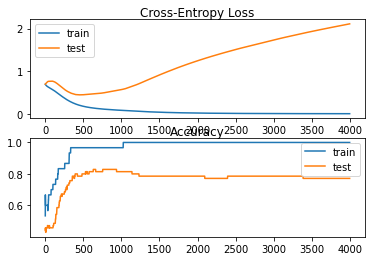

In [6]:
# plot loss learning curves
pyplot.subplot(211)
pyplot.title('Cross-Entropy Loss', pad=-40)
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()

# plot accuracy learning curves
pyplot.subplot(212)
pyplot.title('Accuracy', pad=-40)
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.legend()

pyplot.show()

We can tie all of these pieces together; the complete example is listed below.

In [7]:
# overfit mlp for the moons dataset
from sklearn.datasets import make_circles
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from matplotlib import pyplot

# generate 2d classification dataset
X, y = make_circles(n_samples=100, noise=0.1, random_state=1)

# split into train and test sets
n_train = 30
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]

# define model
model = Sequential()
model.add(Dense(500, input_dim=2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# fit model
history = model.fit(trainX, trainy, epochs=4000, validation_data=(testX, testy), verbose=0)

# evaluate the model
_, train_acc = model.evaluate(trainX, trainy, verbose=0)
_, test_acc = model.evaluate(testX, testy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

Train: 1.000, Test: 0.757


Running the example first reports the model performance on the train and test datasets. We can see that the model has better performance on the training dataset than the test dataset, one possible sign of overfitting.

**Note:** Your specific results may vary, given the stochastic nature of the learning algorithm. Consider running the example a few times and compare the average performance.

A figure is created showing line plots of the model loss and accuracy on the train and test sets. We can see the expected shape of an overfit model where test accuracy increases to a point and then begins to decrease again. The effect is even more dramatic with loss, showing a large increase in test set loss as training continues.

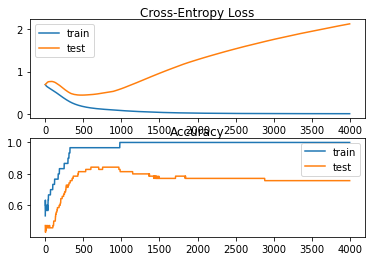

In [8]:
# plot loss learning curves
pyplot.subplot(211)
pyplot.title('Cross-Entropy Loss', pad=-40)
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()

# plot accuracy learning curves
pyplot.subplot(212)
pyplot.title('Accuracy', pad=-40)
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.legend()

pyplot.show()

### MLP With Input Layer Noise

The dataset is defined by points that have a controlled amount of statistical noise. Nevertheless, we may wish to add further noise to the input values because the dataset is small. This will create more samples or resampling the domain, making the structure of the input space artificially smoother. This may make the problem easier to learn and improve generalization performance. We can add a GaussianNoise layer as the input layer, and the amount of noise must be small. Given that the input values are within the range [0, 1], we will add Gaussian noise with a mean of 0.0 and a standard deviation of 0.01, chosen arbitrarily.

In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GaussianNoise

# define model
model = Sequential()
model.add(GaussianNoise(0.01, input_shape=(2,)))
model.add(Dense(500, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

The complete example of this change is listed below.

In [22]:
# mlp overfit on the two circles dataset with input noise
from sklearn.datasets import make_circles
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GaussianNoise
from matplotlib import pyplot

# generate 2d classification dataset
X, y = make_circles(n_samples=100, noise=0.1, random_state=1)

# split into train and test
n_train = 30
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]

# define model
model = Sequential()
model.add(GaussianNoise(0.01, input_shape=(2,)))
model.add(Dense(500, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# fit model
history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=4000, verbose=0)

# evaluate the model
_, train_acc = model.evaluate(trainX, trainy, verbose=0)
_, test_acc = model.evaluate(testX, testy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

Train: 1.000, Test: 0.786


Running the example reports the model performance on the train and test datasets.

**Note:** Your specific results may vary, given the stochastic nature of the learning algorithm. Consider running the example a few times and compare the average performance.

In this case, we may see a slight lift in the model's performance on the test dataset, with no negative impact on the training dataset.

We see the impact of the added noise on the evaluation of the model during training as graphed on the line plot. The noise causes the model's accuracy to jump around during training, possibly due to the noise introducing points that conflict with true points from the training dataset. Perhaps a lower input noise standard deviation would be more appropriate. The model still shows a pattern of overfitting, with a rise and then fall in test accuracy over training epochs.

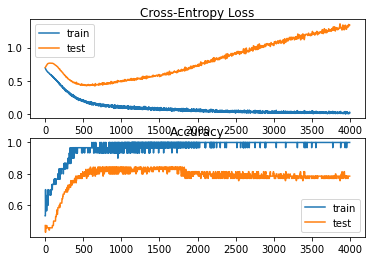

In [23]:
# plot loss learning curves
pyplot.subplot(211)
pyplot.title('Cross-Entropy Loss', pad=-40)
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()

# plot accuracy learning curves
pyplot.subplot(212)
pyplot.title('Accuracy', pad=-40)
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.legend()

pyplot.show()

### MLP With Hidden Layer Noise

An alternative approach to adding noise to the input values is to add noise between the hidden layers. This can be done by adding noise to the linear output of the layer (weighted sum) before the activation function is applied, in this case, a rectified linear activation function. We can also use a larger standard deviation for the noise as the model is less sensitive to noise at this level, given the presumably larger weights from overfitting. We will use a standard deviation of 0.1, again, chosen arbitrarily.

In [25]:
from tensorflow.keras.layers import Activation

# define model
model = Sequential()
model.add(Dense(500, input_dim=2))
model.add(GaussianNoise(0.1))
model.add(Activation('relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

The complete example with Gaussian noise between the hidden layers is listed below.

In [26]:
# mlp overfit on the two circles dataset with hidden layer noise
from sklearn.datasets import make_circles
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, GaussianNoise
from matplotlib import pyplot

# generate 2d classification dataset
X, y = make_circles(n_samples=100, noise=0.1, random_state=1)

# split into train and test
n_train = 30
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]

# define model
model = Sequential()
model.add(Dense(500, input_dim=2))
model.add(GaussianNoise(0.1))
model.add(Activation('relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# fit model
history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=4000, verbose=0)

# evaluate the model
_, train_acc = model.evaluate(trainX, trainy, verbose=0)
_, test_acc = model.evaluate(testX, testy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

Train: 0.967, Test: 0.786


Running the example reports the model performance on the train and test datasets.

**Note:** Your specific results may vary, given the stochastic nature of the learning algorithm. Consider running the example a few times and compare the average performance.

In this case, we can see a marked increase in the model's performance on the hold-out test set.

We can also see from the line plot of accuracy over training epochs that the model no longer appears to show the properties of overfitting with regard to classification accuracy. The learning curves for loss do still show a pattern of overfitting.

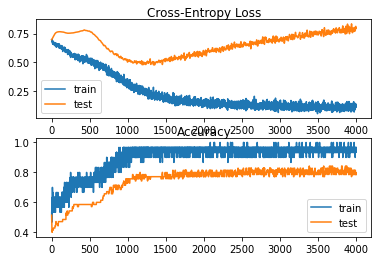

In [27]:
# plot loss learning curves
pyplot.subplot(211)
pyplot.title('Cross-Entropy Loss', pad=-40)
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()

# plot accuracy learning curves
pyplot.subplot(212)
pyplot.title('Accuracy', pad=-40)
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.legend()

pyplot.show()

We can also experiment and add the noise after the outputs of the first hidden layer pass through the activation function.

In [28]:
# define model
model = Sequential()
model.add(Dense(500, input_dim=2, activation='relu'))
model.add(GaussianNoise(0.1))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

The complete example is listed below.

In [29]:
# mlp overfit on the two circles dataset with hidden layer noise (alternate)
from sklearn.datasets import make_circles
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GaussianNoise
from matplotlib import pyplot

# generate 2d classification dataset
X, y = make_circles(n_samples=100, noise=0.1, random_state=1)

# split into train and test
n_train = 30
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]

# define model
model = Sequential()
model.add(Dense(500, input_dim=2, activation='relu'))
model.add(GaussianNoise(0.1))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# fit model
history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=4000, verbose=0)

# evaluate the model
_, train_acc = model.evaluate(trainX, trainy, verbose=0)
_, test_acc = model.evaluate(testX, testy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

Train: 1.000, Test: 0.814


Running the example reports the model performance on the train and test datasets.

**Note:** Your specific results may vary, given the stochastic nature of the learning algorithm. Consider running the example a few times and compare the average performance.

Surprisingly, we see little difference in the model's performance, perhaps a tiny lift in performance.

Again, we can see from the line plot of accuracy over training epochs that the model no longer shows signs of overfitting.

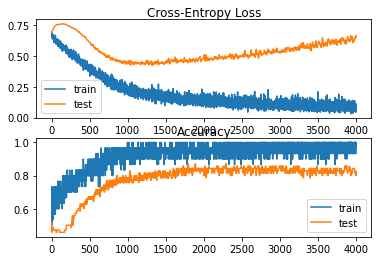

In [30]:
# plot loss learning curves
pyplot.subplot(211)
pyplot.title('Cross-Entropy Loss', pad=-40)
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()

# plot accuracy learning curves
pyplot.subplot(212)
pyplot.title('Accuracy', pad=-40)
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.legend()

pyplot.show()

## Extensions

This section lists some ideas for extending the tutorial that you may wish to explore.

* **Repeated Evaluation**. Update the example to use repeated model evaluation with and without noise and report performance as the mean and standard deviation over repeats.
* **Grid Search Standard Deviation**. Develop a grid search to discover the amount of noise that reliably results in the best-performing model.
* **Input and Hidden Noise**. Update the example to introduce noise at both the input and hidden layers of the model.

## Summary

In this tutorial, you discovered that adding noise to a neural network during training can improve the robustness of the network resulting in better generalization and faster learning. Specifically, you learned:

* Small datasets can make learning challenging for neural nets, and the examples can be memorized.
* Adding noise during training can make the training process more robust and reduce generalization error.
* Noise is traditionally added to the inputs but can also be added to weights, gradients, and even activation functions.